# **STOCK TECHNICAL INDICATORS**


In [ ]:
#Description: Create and plot multiple technical indicators

In [2]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Load the data
from google.colab import files
files.upload()

Saving TSLA.csv to TSLA.csv


{'TSLA.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2020-10-30,406.899994,407.589996,379.109985,388.040009,388.040009,42511300\n2020-11-02,394.000000,406.980011,392.299988,400.510010,400.510010,29021100\n2020-11-03,409.730011,427.769989,406.690002,423.899994,423.899994,34351700\n2020-11-04,430.619995,435.399994,417.100006,420.980011,420.980011,32143100\n2020-11-05,428.299988,440.000000,424.000000,438.089996,438.089996,28414500\n2020-11-06,436.100006,436.570007,424.279999,429.950012,429.950012,21706000\n2020-11-09,439.500000,452.500000,421.000000,421.260010,421.260010,34833000\n2020-11-10,420.089996,420.089996,396.029999,410.359985,410.359985,30284200\n2020-11-11,416.450012,418.700012,410.579987,417.130005,417.130005,17357700\n2020-11-12,415.049988,423.000000,409.519989,411.760010,411.760010,19855100\n2020-11-13,410.850006,412.529999,401.660004,408.500000,408.500000,19771100\n2020-11-16,408.929993,412.450012,404.089996,408.089996,408.089996,26838600\n2020-11-17,460.170013,462.0000

In [5]:
#Store the data
df = pd.read_csv('TSLA.csv')
#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-10-30,2020-10-30,406.899994,407.589996,379.109985,388.040009,388.040009,42511300
2020-11-02,2020-11-02,394.000000,406.980011,392.299988,400.510010,400.510010,29021100
2020-11-03,2020-11-03,409.730011,427.769989,406.690002,423.899994,423.899994,34351700
2020-11-04,2020-11-04,430.619995,435.399994,417.100006,420.980011,420.980011,32143100
2020-11-05,2020-11-05,428.299988,440.000000,424.000000,438.089996,438.089996,28414500
...,...,...,...,...,...,...,...
2021-10-25,2021-10-25,950.530029,1045.020020,944.200012,1024.859985,1024.859985,62852100
2021-10-26,2021-10-26,1024.689941,1094.939941,1001.440002,1018.429993,1018.429993,62415000
2021-10-27,2021-10-27,1039.660034,1070.880005,1030.780029,1037.859985,1037.859985,38526500
2021-10-28,2021-10-28,1068.310059,1081.000000,1054.199951,1077.040039,1077.040039,27213200


In [15]:
#Create functions to calculate the SMA & EMA
#Create the Simple Moving Average (SMA)
def SMA(data, period=30, column='Close'):
  return data[column].rolling(window=period).mean()

#Create the Exponential Moving Average (EMA)
def EMA(data, period=20, column='Close'):
  return data[column].ewm(span=period, adjust = False).mean()


In [8]:
#Calculate the MACD Moving Average Convergence/Devergence (MACD)
def MACD(data, period_long=26, period_short=12, period_signal = 9, column='Close'):
  #Calculate the Short Term Exponential Moving Average
  ShortEMA = EMA(data, period_short, column = column)
  #Calculate the Long Term Exponential Moving Average
  LongEMA = EMA(data, period_long, column = column)
  #Calculate the Moving AVerage Convergence/Devergence (MACD)
  data['MACD'] = ShortEMA - LongEMA
  #Calculate the signal line
  data['Signal_Line'] = EMA(data, period_signal, column='MACD')

  return data

In [9]:
#Create a function to computer the Relative Strength Index (RSI)
def RSI(data, period = 14, column='Close'):
  delta = data[column].diff(1)
  delta = delta[1:]
  up = delta.copy()
  down = delta.copy()
  up[up<0] = 0
  down[down>0] = 0
  data['up'] = up
  data['down'] = down
  AVG_Gain = SMA(data, period, column = 'up')
  AVG_Loss = abs(SMA(data, period, column = 'down'))
  RS = AVG_Gain / AVG_Loss
  RSI = (100.0/(1.0 + RS))

  data['RSI'] = RSI

  return data


In [16]:
#Create/add to the data set
MACD(df)
RSI(df)
df['SMA'] = SMA(df)
df['EMA'] = EMA(df)


In [17]:
#Show thw data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal_Line,up,down,RSI,SMA,EMA
2020-10-30,2020-10-30,406.899994,407.589996,379.109985,388.040009,388.040009,42511300,0.000000,0.000000,NaN,NaN,NaN,NaN,388.040009
2020-11-02,2020-11-02,394.000000,406.980011,392.299988,400.510010,400.510010,29021100,0.994758,0.198952,12.470001,0.000000,NaN,NaN,389.227628
2020-11-03,2020-11-03,409.730011,427.769989,406.690002,423.899994,423.899994,34351700,3.628658,0.884893,23.389984,0.000000,NaN,NaN,392.529758
2020-11-04,2020-11-04,430.619995,435.399994,417.100006,420.980011,420.980011,32143100,5.417970,1.791508,0.000000,-2.919983,NaN,NaN,395.239306
2020-11-05,2020-11-05,428.299988,440.000000,424.000000,438.089996,438.089996,28414500,8.123008,3.057808,17.109985,0.000000,NaN,NaN,399.320324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,2021-10-25,950.530029,1045.020020,944.200012,1024.859985,1024.859985,62852100,47.698335,31.325405,115.179992,0.000000,5.128758,803.000999,843.799335
2021-10-26,2021-10-26,1024.689941,1094.939941,1001.440002,1018.429993,1018.429993,62415000,55.592202,36.178764,0.000000,-6.429992,7.375374,812.132332,860.430827
2021-10-27,2021-10-27,1039.660034,1070.880005,1030.780029,1037.859985,1037.859985,38526500,62.693297,41.481671,19.429992,0.000000,7.153619,821.533331,877.328842
2021-10-28,2021-10-28,1068.310059,1081.000000,1054.199951,1077.040039,1077.040039,27213200,70.667853,47.318907,39.180054,0.000000,3.881793,832.201666,896.348956


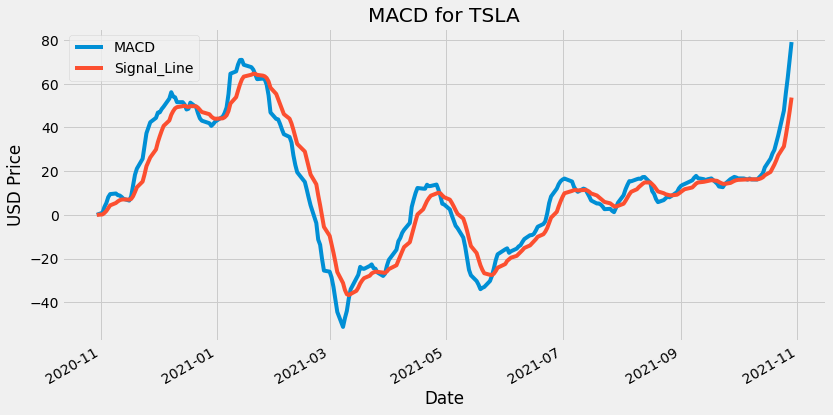

In [23]:
#Plot the chart
#Create a list of columns to keep
column_list = ['MACD', 'Signal_Line']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('MACD for TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

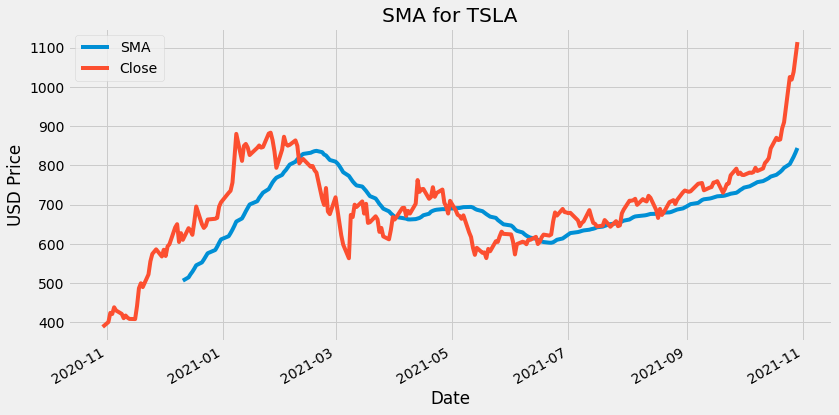

In [25]:
#Plot the chart
#Create a list of columns to keep
column_list = ['SMA', 'Close']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('SMA for TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

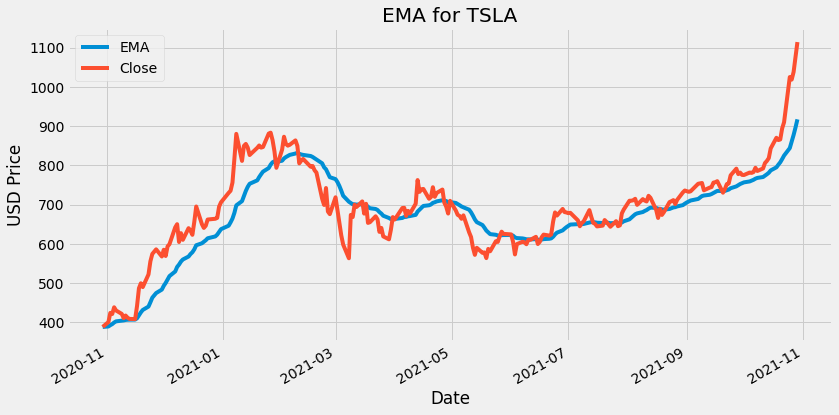

In [26]:
#Plot the chart
#Create a list of columns to keep
column_list = ['EMA', 'Close']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('EMA for TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

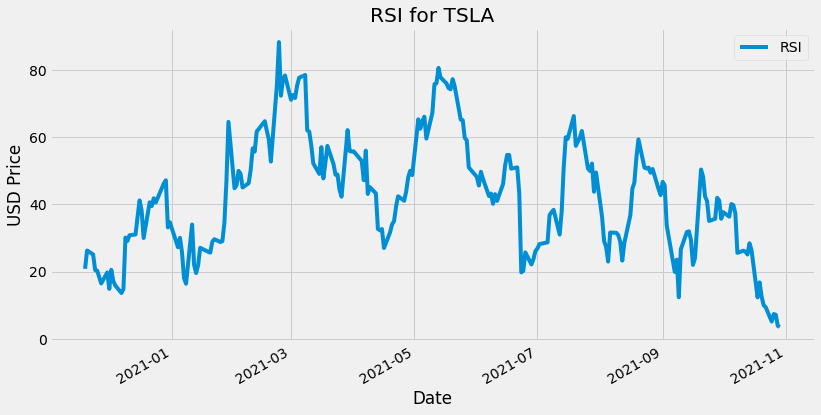

In [27]:
#Plot the chart
#Create a list of columns to keep
column_list = ['RSI']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('RSI for TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()